# TSFresh

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Folder Opening and Data Organization

In [2]:
#From FFNN_v2

#Load and preprocess the data
folder_path = 'TDS_15000'
data = {}

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        with open(file_path, 'r') as file:
            df1 = pd.read_csv(file_path, header=None, names=['des_flux', 'detrap_en', 'def_conc'], index_col=None, squeeze = True)
            data[filename] = df1
            
# Combine all the data into a single dataframe
df = pd.concat(data.values())

display(df)

C:\Users\mvigi\AppData\Local\Temp\ipykernel_7296\4185725018.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df1 = pd.read_csv(file_path, header=None, names=['des_flux', 'detrap_en', 'def_conc'], index_col=None, squeeze = True)
C:\Users\mvigi\AppData\Local\Temp\ipykernel_7296\4185725018.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df1 = pd.read_csv(file_path, header=None, names=['des_flux', 'detrap_en', 'def_conc'], index_col=None, squeeze = True)
C:\Users\mvigi\AppData\Local\Temp\ipykernel_7296\4185725018.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df1 = pd.read_csv(file_path, header=None, names=['des_flux', 'detrap_en', 'def_conc'], index_col=None, sq

des_flux  detrap_en  def_conc
0    0.000000e+00   1.075086  0.012055
1    5.431556e+14   1.090598  0.012796
2    8.071071e+14   1.280902  0.002110
3    1.184429e+15   1.363821  0.024988
4    1.713761e+15        NaN       NaN
..            ...        ...       ...
296  1.381320e+11        NaN       NaN
297  5.097957e+10        NaN       NaN
298 -1.185340e+11        NaN       NaN
299 -1.753088e+11        NaN       NaN
300  2.223803e+11        NaN       NaN

[4515000 rows x 3 columns]

In [3]:
#Instead of shaping by 500, have to shape
#to create a design matrix in TSFresh

#Maybe turn this into a loop?
des_flux=df['des_flux']
des_flux=des_flux.tolist()
num_files=int(len(des_flux)/301)
des_flux=np.reshape(des_flux, [num_files, 301])
#des_flux=pd.DataFrame(des_flux)
display(des_flux)
#print(type(des_flux[0]), des_flux.shape)
#plt.plot(des_flux)

array([[ 0.00000000e+00,  5.43155589e+14,  8.07107134e+14, ...,
         2.01564589e+10,  9.74552070e+09, -8.88008277e+09],
       [ 0.00000000e+00,  2.59668597e+12,  4.07671353e+12, ...,
         1.60091558e+08,  3.88972048e+08,  6.25874398e+08],
       [ 0.00000000e+00,  3.33968287e+09,  5.64202057e+09, ...,
        -1.77104244e+11, -3.25368009e+11,  2.11390510e+11],
       ...,
       [-4.35153102e-10,  3.25823198e+15,  4.51811591e+15, ...,
        -4.40433457e+11, -2.05314378e+11, -1.19524462e+11],
       [ 0.00000000e+00,  1.58741825e+14,  2.39341911e+14, ...,
        -1.13773164e+10, -8.33057727e+09,  1.28537117e+08],
       [ 0.00000000e+00,  2.59323182e+14,  3.86532956e+14, ...,
        -1.18533990e+11, -1.75308845e+11,  2.22380273e+11]])

In [4]:
detrap_en=df['detrap_en']
detrap_en=detrap_en.dropna()
detrap_en=detrap_en.tolist()
num_files=int(len(detrap_en)/4)
detrap_en=np.reshape(detrap_en, [num_files, 4])
detrap_en_mean=detrap_en.mean(axis=1)
#detrap_en=np.reshape(detrap_en, [-1, 1])
detrap_en=pd.DataFrame(detrap_en)
detrap_en_mean=pd.DataFrame(detrap_en_mean)
display(detrap_en_mean)
#print(detrap_en, detrap_en.shape)

def_conc=df['def_conc']
def_conc=def_conc.dropna()
def_conc=def_conc.tolist()
num_files=int(len(def_conc)/4)
def_conc=np.reshape(def_conc, [num_files, 4])
def_conc_mean=def_conc.mean(axis=1)
#def_conc=np.reshape(def_conc, [-1, 1])
def_conc=pd.DataFrame(def_conc)
def_conc_mean=pd.DataFrame(def_conc_mean)
display(def_conc_mean)
#print(def_conc, def_conc.shape)

0
0      1.202602
1      1.511330
2      1.514125
3      1.416363
4      1.580196
...         ...
14995  1.646276
14996  1.566460
14997  1.655664
14998  1.361097
14999  1.308750

[15000 rows x 1 columns]

0
0      0.012987
1      0.007481
2      0.011929
3      0.013044
4      0.014363
...         ...
14995  0.012199
14996  0.014365
14997  0.012734
14998  0.009443
14999  0.012198

[15000 rows x 1 columns]

# Adding Gaussian Noise to des_flux

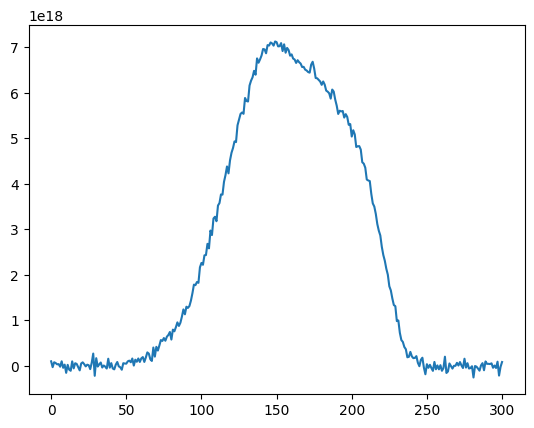

In [5]:
spect_wnoise=[]
noise_array=[]
sigma_list=[]
for n in np.arange(0, len(des_flux)):
    sigma_rand = np.random.uniform(1E14, 1E17)
    for i, k in enumerate(des_flux[n]):
        spect_wnoise.append(np.random.normal(k, sigma_rand))
    sigma_list.append(str(sigma_rand))
    noise_array.append(spect_wnoise)
    spect_wnoise=[]
plt.plot(noise_array[4])
plt.show()

# Preparation for Feature Extraction

In [6]:
#TSFresh is not reading in large values
#Like the raw TDS data. Normalize beforehand then
#do TSFresh

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
des_flux_norm = scaler.fit_transform(des_flux.reshape(-1, 1))

In [7]:
#make back into a 1d dataframe.
#Ask Anze whether it's best to normalize
#by complete dataset or by spectrum

des_flux_norm=pd.DataFrame(des_flux_norm)
display(des_flux_norm)

0
0       -0.836390
1       -0.836169
2       -0.836063
3       -0.835910
4       -0.835695
...           ...
4514995 -0.836389
4514996 -0.836389
4514997 -0.836390
4514998 -0.836390
4514999 -0.836389

[4515000 rows x 1 columns]

In [8]:
#Create an array counting 0 to 499,
#301 times for each count
#This marks the sequential data
#with an id used in TSFresh

des_flux_id = np.arange(0,des_flux_norm.shape[0])
des_flux_id = des_flux_id // 301

#Applies the id to the data
#display(des_flux_id)
des_flux_norm["id"] = des_flux_id
display(des_flux_norm)

0     id
0       -0.836390      0
1       -0.836169      0
2       -0.836063      0
3       -0.835910      0
4       -0.835695      0
...           ...    ...
4514995 -0.836389  14999
4514996 -0.836389  14999
4514997 -0.836390  14999
4514998 -0.836390  14999
4514999 -0.836389  14999

[4515000 rows x 2 columns]

In [9]:
#Checking for proper shape
#and statistics

display(des_flux_norm.mean(), des_flux_norm.std(), des_flux_norm.min(), des_flux_norm.max())

0    -2.486207e-16
id    7.499500e+03
dtype: float64

0        1.000000
id    4330.127489
dtype: float64

0    -0.881514
id    0.000000
dtype: float64

0         7.023513
id    14999.000000
dtype: float64

# Feature Extraction and Selection

In [10]:
from tsfresh import extract_features
features = extract_features(des_flux_norm, column_id="id", column_sort="id")

Feature Extraction: 100%|██████████| 20/20 [15:22<00:00, 46.13s/it]  


In [11]:
#Display extracted features.
#Filtered features won't run with NaN values, 
#so drop 0__query_similarity_count__query_None__threshold_0.0 column

display(features)
list(features.columns)
features=features.drop(["0__query_similarity_count__query_None__threshold_0.0"], axis=1)
display(features)
features.to_csv('TDS_15000_wgauss_features.csv', index=False)

0__variance_larger_than_standard_deviation  0__has_duplicate_max  \
0                                             1.0                   0.0   
1                                             0.0                   0.0   
2                                             1.0                   0.0   
3                                             0.0                   0.0   
4                                             1.0                   0.0   
...                                           ...                   ...   
14995                                         0.0                   0.0   
14996                                         0.0                   0.0   
14997                                         0.0                   0.0   
14998                                         0.0                   0.0   
14999                                         0.0                   0.0   

       0__has_duplicate_min  0__has_duplicate  0__sum_values  0__abs_energy  \
0                       0.0               0.0       8.708354     404.786156   
1                       0.0               0.0    -101.703668     113.603909   
2                       0.0               0.0     -12.485865     388.634793   
3                       0.0               0.0       9.871415     176.581564   
4                       0.0               0.0      36.353369     363.079226   
...                     ...               ...            ...            ...   
14995                   0.0               0.0      -7.060538     200.565980   
14996                   0.0               0.0      36.384309     214.487044   
14997                   0.0               0.0       3.659842     156.713264   
14998                   0.0               0.0     -62.367263     179.848797   
14999                   0.0               0.0      -7.101441     271.654563   

       0__mean_abs_change  0__mean_change  0__mean_second_derivative_central  \
0                0.113222   -1.198953e-11                          -0.005247   
1                0.057339    8.450303e-13                          -0.002836   
2                0.152651    2.854109e-10                          -0.001928   
3                0.125830   -4.894245e-11                          -0.005593   
4                0.132809   -9.282605e-11                          -0.004362   
...                   ...             ...                                ...   
14995            0.120701   -6.929385e-11                          -0.002688   
14996            0.109450   -7.470166e-11                          -0.004253   
14997            0.111361   -1.613771e-10                          -0.003553   
14998            0.111593    1.735456e-13                          -0.002785   
14999            0.141099    3.002488e-10                          -0.002695   

       0__median  ...  0__fourier_entropy__bins_5  \
0      -0.805142  ...                    0.200814   
1      -0.478531  ...                    0.090729   
2      -0.782630  ...                    0.155665   
3       0.097885  ...                    0.239211   
4      -0.531208  ...                    0.090729   
...          ...  ...                         ...   
14995  -0.242243  ...                    0.204871   
14996   0.278492  ...                    0.249958   
14997  -0.131008  ...                    0.284235   
14998  -0.724247  ...                    0.269433   
14999  -0.594309  ...                    0.200814   

       0__fourier_entropy__bins_10  0__fourier_entropy__bins_100  \
0                         0.310337                      1.371395   
1                         0.170467                      1.098559   
2                         0.155665                      0.965696   
3                         0.359290                      1.339878   
4                         0.170467                      0.808030   
...                            ...                           ...   
14995                     0.305728                      1.385047   
14996          

0__variance_larger_than_standard_deviation  0__has_duplicate_max  \
0                                             1.0                   0.0   
1                                             0.0                   0.0   
2                                             1.0                   0.0   
3                                             0.0                   0.0   
4                                             1.0                   0.0   
...                                           ...                   ...   
14995                                         0.0                   0.0   
14996                                         0.0                   0.0   
14997                                         0.0                   0.0   
14998                                         0.0                   0.0   
14999                                         0.0                   0.0   

       0__has_duplicate_min  0__has_duplicate  0__sum_values  0__abs_energy  \
0                       0.0               0.0       8.708354     404.786156   
1                       0.0               0.0    -101.703668     113.603909   
2                       0.0               0.0     -12.485865     388.634793   
3                       0.0               0.0       9.871415     176.581564   
4                       0.0               0.0      36.353369     363.079226   
...                     ...               ...            ...            ...   
14995                   0.0               0.0      -7.060538     200.565980   
14996                   0.0               0.0      36.384309     214.487044   
14997                   0.0               0.0       3.659842     156.713264   
14998                   0.0               0.0     -62.367263     179.848797   
14999                   0.0               0.0      -7.101441     271.654563   

       0__mean_abs_change  0__mean_change  0__mean_second_derivative_central  \
0                0.113222   -1.198953e-11                          -0.005247   
1                0.057339    8.450303e-13                          -0.002836   
2                0.152651    2.854109e-10                          -0.001928   
3                0.125830   -4.894245e-11                          -0.005593   
4                0.132809   -9.282605e-11                          -0.004362   
...                   ...             ...                                ...   
14995            0.120701   -6.929385e-11                          -0.002688   
14996            0.109450   -7.470166e-11                          -0.004253   
14997            0.111361   -1.613771e-10                          -0.003553   
14998            0.111593    1.735456e-13                          -0.002785   
14999            0.141099    3.002488e-10                          -0.002695   

       0__median  ...  0__fourier_entropy__bins_3  0__fourier_entropy__bins_5  \
0      -0.805142  ...                    0.155665                    0.200814   
1      -0.478531  ...                    0.090729                    0.090729   
2      -0.782630  ...                    0.045395                    0.155665   
3       0.097885  ...                    0.159721                    0.239211   
4      -0.531208  ...                    0.090729                    0.090729   
...          ...  ...                         ...                         ...   
14995  -0.242243  ...                    0.125256                    0.204871   
14996   0.278492  ...                    0.155665                    0.249958   
14997  -0.131008  ...                    0.190068                    0.284235   
14998  -0.724247  ...                    0.159721                    0.269433   
14999  -0.594309  ...                    0.125256                    0.200814   

       0__fourier_entropy__bins_10  0__fourier_entropy__bins_100  \
0                         0.310337                      1.371395   
1                         0.170467                      1.098559   
2                  

In [12]:
#Attempting to convert df to
#Series. Its multidimensional,
#may have to take the mean. 

type(detrap_en_mean)
detrap_en_mean = detrap_en_mean.squeeze()
display(detrap_en_mean)
type(detrap_en_mean)

type(def_conc_mean)
def_conc_mean = def_conc_mean.squeeze()
display(def_conc_mean)
type(def_conc_mean)

0        1.202602
1        1.511330
2        1.514125
3        1.416363
4        1.580196
           ...   
14995    1.646276
14996    1.566460
14997    1.655664
14998    1.361097
14999    1.308750
Name: 0, Length: 15000, dtype: float64

0        0.012987
1        0.007481
2        0.011929
3        0.013044
4        0.014363
           ...   
14995    0.012199
14996    0.014365
14997    0.012734
14998    0.009443
14999    0.012198
Name: 0, Length: 15000, dtype: float64

pandas.core.series.Series

In [13]:
#Where I'm currently stuck
#Calculating filtered features from the calculated
#extracted features. Only wants the output target as
#a Series. Choices: Convert def_conc and detrap_en
#into a Series by taking the mean of each row, 
#finding a workaround to allow for the target to 
#be a DataFrame, or find a similar module. 

from tsfresh import select_features, feature_selection
from tsfresh.feature_selection.relevance import calculate_relevance_table
detrap_en_relevance_table = calculate_relevance_table(features, detrap_en_mean, ml_task='regression')
def_conc_relevance_table = calculate_relevance_table(features, def_conc_mean, ml_task='regression')

In [14]:
detrap_en_relevance_table=pd.DataFrame(detrap_en_relevance_table)
display((detrap_en_relevance_table))
detrap_en_relevance_table=detrap_en_relevance_table.dropna()
detrap_en_relevance_table=detrap_en_relevance_table[detrap_en_relevance_table['relevant'] == True] 
detrap_en_relevance_table.sort_values("p_value", inplace=True)
display(detrap_en_relevance_table)
detrap_en_relevance_table.to_csv('TDS_15000_wgauss_detrap_en_relevance_table.csv', index=False)

feature  \
feature                                                                                
0__fft_coefficient__attr_"imag"__coeff_33  0__fft_coefficient__attr_"imag"__coeff_33   
0__fft_coefficient__attr_"imag"__coeff_87  0__fft_coefficient__attr_"imag"__coeff_87   
0__fft_coefficient__attr_"imag"__coeff_89  0__fft_coefficient__attr_"imag"__coeff_89   
0__fft_coefficient__attr_"imag"__coeff_90  0__fft_coefficient__attr_"imag"__coeff_90   
0__fft_coefficient__attr_"imag"__coeff_92  0__fft_coefficient__attr_"imag"__coeff_92   
...                                                                              ...   
0__number_crossing_m__m_-1                                0__number_crossing_m__m_-1   
0__ratio_beyond_r_sigma__r_5                            0__ratio_beyond_r_sigma__r_5   
0__ratio_beyond_r_sigma__r_6                            0__ratio_beyond_r_sigma__r_6   
0__ratio_beyond_r_sigma__r_7                            0__ratio_beyond_r_sigma__r_7   
0__ratio_beyond_r_sigma__r_10                          0__ratio_beyond_r_sigma__r_10   

                                               type  p_value  relevant  
feature                                                                 
0__fft_coefficient__attr_"imag"__coeff_33      real      0.0      True  
0__fft_coefficient__attr_"imag"__coeff_87      real      0.0      True  
0__fft_coefficient__attr_"imag"__coeff_89      real      0.0      True  
0__fft_coefficient__attr_"imag"__coeff_90      real      0.0      True  
0__fft_coefficient__attr_"imag"__coeff_92      real      0.0      True  
...                                             ...      ...       ...  
0__number_crossing_m__m_-1                 constant      NaN     False  
0__ratio_beyond_r_sigma__r_5               constant      NaN     False  
0__ratio_beyond_r_sigma__r_6               constant      NaN     False  
0__ratio_beyond_r_sigma__r_7               constant      NaN     False  
0__ratio_beyond_r_sigma__r_10              constant      NaN     False  

[782 rows x 4 columns]

feature  \
feature                                                                                                 
0__fft_coefficient__attr_"imag"__coeff_33                   0__fft_coefficient__attr_"imag"__coeff_33   
0__fft_coefficient__attr_"angle"__coeff_84                 0__fft_coefficient__attr_"angle"__coeff_84   
0__agg_linear_trend__attr_"slope"__chunk_len_50...  0__agg_linear_trend__attr_"slope"__chunk_len_5...   
0__fft_coefficient__attr_"angle"__coeff_97                 0__fft_coefficient__attr_"angle"__coeff_97   
0__fft_coefficient__attr_"angle"__coeff_98                 0__fft_coefficient__attr_"angle"__coeff_98   
...                                                                                               ...   
0__fft_coefficient__attr_"abs"__coeff_83                     0__fft_coefficient__attr_"abs"__coeff_83   
0__fft_coefficient__attr_"abs"__coeff_42                     0__fft_coefficient__attr_"abs"__coeff_42   
0__large_standard_deviation__r_0.4                                 0__large_standard_deviation__r_0.4   
0__fft_coefficient__attr_"angle"__coeff_28                 0__fft_coefficient__attr_"angle"__coeff_28   
0__friedrich_coefficients__coeff_0__m_3__r_30           0__friedrich_coefficients__coeff_0__m_3__r_30   

                                                      type   p_value  relevant  
feature                                                                         
0__fft_coefficient__attr_"imag"__coeff_33             real  0.000000      True  
0__fft_coefficient__attr_"angle"__coeff_84            real  0.000000      True  
0__agg_linear_trend__attr_"slope"__chunk_len_50...    real  0.000000      True  
0__fft_coefficient__attr_"angle"__coeff_97            real  0.000000      True  
0__fft_coefficient__attr_"angle"__coeff_98            real  0.000000      True  
...                                                    ...       ...       ...  
0__fft_coefficient__attr_"abs"__coeff_83              real  0.003725      True  
0__fft_coefficient__attr_"abs"__coeff_42              real  0.004185      True  
0__large_standard_deviation__r_0.4                  binary  0.004282      True  
0__fft_coefficient__attr_"angle"__coeff_28            real  0.005844      True  
0__friedrich_coefficients__coeff_0__m_3__r_30         real  0.006402      True  

[693 rows x 4 columns]

In [15]:
def_conc_relevance_table=pd.DataFrame(def_conc_relevance_table)
display((def_conc_relevance_table))
def_conc_relevance_table=def_conc_relevance_table.dropna()
def_conc_relevance_table=def_conc_relevance_table[def_conc_relevance_table['relevant'] == True] 
def_conc_relevance_table.sort_values("p_value", inplace=True)
display(def_conc_relevance_table)
def_conc_relevance_table.to_csv('TDS_15000_wgauss_def_conc_relevance_table.csv', index=False)

feature  \
feature                                                                            
0__sum_values                                                      0__sum_values   
0__fft_coefficient__attr_"abs"__coeff_9  0__fft_coefficient__attr_"abs"__coeff_9   
0__fft_coefficient__attr_"abs"__coeff_7  0__fft_coefficient__attr_"abs"__coeff_7   
0__fft_coefficient__attr_"abs"__coeff_6  0__fft_coefficient__attr_"abs"__coeff_6   
0__fft_coefficient__attr_"abs"__coeff_5  0__fft_coefficient__attr_"abs"__coeff_5   
...                                                                          ...   
0__number_crossing_m__m_-1                            0__number_crossing_m__m_-1   
0__ratio_beyond_r_sigma__r_5                        0__ratio_beyond_r_sigma__r_5   
0__ratio_beyond_r_sigma__r_6                        0__ratio_beyond_r_sigma__r_6   
0__ratio_beyond_r_sigma__r_7                        0__ratio_beyond_r_sigma__r_7   
0__ratio_beyond_r_sigma__r_10                      0__ratio_beyond_r_sigma__r_10   

                                             type  p_value  relevant  
feature                                                               
0__sum_values                                real      0.0      True  
0__fft_coefficient__attr_"abs"__coeff_9      real      0.0      True  
0__fft_coefficient__attr_"abs"__coeff_7      real      0.0      True  
0__fft_coefficient__attr_"abs"__coeff_6      real      0.0      True  
0__fft_coefficient__attr_"abs"__coeff_5      real      0.0      True  
...                                           ...      ...       ...  
0__number_crossing_m__m_-1               constant      NaN     False  
0__ratio_beyond_r_sigma__r_5             constant      NaN     False  
0__ratio_beyond_r_sigma__r_6             constant      NaN     False  
0__ratio_beyond_r_sigma__r_7             constant      NaN     False  
0__ratio_beyond_r_sigma__r_10            constant      NaN     False  

[782 rows x 4 columns]

feature  \
feature                                                                                                 
0__sum_values                                                                           0__sum_values   
0__fft_coefficient__attr_"abs"__coeff_52                     0__fft_coefficient__attr_"abs"__coeff_52   
0__fft_coefficient__attr_"abs"__coeff_41                     0__fft_coefficient__attr_"abs"__coeff_41   
0__fft_coefficient__attr_"abs"__coeff_66                     0__fft_coefficient__attr_"abs"__coeff_66   
0__fft_coefficient__attr_"abs"__coeff_68                     0__fft_coefficient__attr_"abs"__coeff_68   
...                                                                                               ...   
0__linear_trend__attr_"rvalue"                                         0__linear_trend__attr_"rvalue"   
0__agg_linear_trend__attr_"slope"__chunk_len_10...  0__agg_linear_trend__attr_"slope"__chunk_len_1...   
0__fft_coefficient__attr_"angle"__coeff_86                 0__fft_coefficient__attr_"angle"__coeff_86   
0__fft_coefficient__attr_"angle"__coeff_26                 0__fft_coefficient__attr_"angle"__coeff_26   
0__fft_coefficient__attr_"angle"__coeff_35                 0__fft_coefficient__attr_"angle"__coeff_35   

                                                    type   p_value  relevant  
feature                                                                       
0__sum_values                                       real  0.000000      True  
0__fft_coefficient__attr_"abs"__coeff_52            real  0.000000      True  
0__fft_coefficient__attr_"abs"__coeff_41            real  0.000000      True  
0__fft_coefficient__attr_"abs"__coeff_66            real  0.000000      True  
0__fft_coefficient__attr_"abs"__coeff_68            real  0.000000      True  
...                                                  ...       ...       ...  
0__linear_trend__attr_"rvalue"                      real  0.002456      True  
0__agg_linear_trend__attr_"slope"__chunk_len_10...  real  0.002883      True  
0__fft_coefficient__attr_"angle"__coeff_86          real  0.003156      True  
0__fft_coefficient__attr_"angle"__coeff_26          real  0.005822      True  
0__fft_coefficient__attr_"angle"__coeff_35          real  0.005960      True  

[641 rows x 4 columns]